In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import itemfreq
%matplotlib inline
import warnings
import re
from datetime import datetime
import math

In [3]:
listing= pd.read_csv('/Users/uthsaharamesh/Box Sync/UT Dallas (uxg180002@utdallas.edu)/Courses/Third Sem/Programming for Data Science/Project/listing_for_modeling.csv')

In [ ]:
listing

In [ ]:
listing.shape

In [ ]:
for i in listing.columns: print(i)

In [ ]:
listing['cancellation_policy'].value_counts()

In [ ]:
listing_1= listing[['id',
                   'host_id', 
                   'host_name',
                   'host_is_superhost',
                   'host_identity_verified',
                   'latitude',
                   'longitude',
                   'neighbourhood',
                   'price',
                   'property_type',
                   'room_type',
                   'accommodates',
                   'bedrooms',
                   'bathrooms',
                   'square_feet',
                   'security_deposit',
                   'cleaning_fee',
                   'guests_included',
                   'extra_people',
                   'minimum_nights',
                   'maximum_nights',
                   'review_scores_rating',
                   'availability_365',
                   'number_of_reviews',
                   'instant_bookable',
                   'cancellation_policy',
                   'require_guest_profile_picture',
                   'require_guest_phone_verification',
                   'neighbourhood_group_cleansed',
                   'review_scores_location',
                   'review_scores_accuracy',
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                    'review_scores_value']]

In [8]:
listing_1.latitude.mean()

52.36533188450913

In [9]:
listing_1.longitude.mean()

4.889516426595538

In [10]:
listing_1.to_csv('listing_for_modeling.csv')

In [11]:
listing_1.shape

(20244, 35)

## Data Cleansing: 
### 1. Checking for Nulls 

In [12]:
listing_1.isnull().sum()

id                                      0
host_id                                 0
host_name                               5
host_is_superhost                       5
host_identity_verified                  5
latitude                                0
longitude                               0
neighbourhood                           0
price                                   0
property_type                           0
room_type                               0
accommodates                            0
bedrooms                               14
bathrooms                               7
square_feet                         19873
security_deposit                     6053
cleaning_fee                         3611
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
review_scores_rating                 2565
availability_365                        0
number_of_reviews                 

### 2. Deleting Columns with more than 60% Null values 

In [13]:
x = listing_1.isna().mean().round(4) * 100
d = pd.DataFrame(x[x > 60])
d.head()
l = list(d.index)
l

['square_feet', 'neighbourhood_group_cleansed']

In [14]:
listing_1.drop(columns=['square_feet', 'neighbourhood_group_cleansed'], inplace=True)

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 3. Data Integrity: Consistency in datatypes for all columns 
#### a. Converting price which is in the format $xxx.xx into float 

In [15]:
listing_1['price']=listing_1['price'].apply(lambda x: round(float(str(x).strip('$').replace(',',''))))

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
listing_1['price']

0         59
1         80
2        125
3        155
4         75
        ... 
20239    350
20240    200
20241     50
20242    124
20243    150
Name: price, Length: 20244, dtype: int64

#### b. Converting security deposit which is in the format $xxx.xx into float 

In [17]:
listing_1['security_deposit']=listing_1['security_deposit'].apply(lambda x: float(str(x).strip('$').replace(',','')))

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
listing_1['security_deposit'].isna().sum()

6053

#### Imputing Nulls for security deposit with mean value

In [19]:
listing_1['security_deposit']=listing_1['security_deposit'].fillna(listing_1['security_deposit'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
listing_1['security_deposit'].isna().sum()

0

#### c. Converting cleaning fee which is in the format $xxx.xx into float 

In [21]:
listing_1['cleaning_fee'] = listing_1['cleaning_fee'].apply(lambda x: float(str(x).strip('$').replace(',','')))

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
listing_1['cleaning_fee'].isna().sum()

3611

#### Imputing Nulls for cleaning fee with mean value

In [23]:
listing_1['cleaning_fee']=listing_1['cleaning_fee'].fillna(listing_1['cleaning_fee'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
listing_1['cleaning_fee'].isna().sum()

0

### Null check after Data Integrity check

In [25]:
listing_1.isna().sum()

id                                     0
host_id                                0
host_name                              5
host_is_superhost                      5
host_identity_verified                 5
latitude                               0
longitude                              0
neighbourhood                          0
price                                  0
property_type                          0
room_type                              0
accommodates                           0
bedrooms                              14
bathrooms                              7
security_deposit                       0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
review_scores_rating                2565
availability_365                       0
number_of_reviews                      0
instant_bookable                       0
cancellation_pol

#### Imputing mean for nulls in review scores rating

In [26]:
listing_1['review_scores_rating']=listing_1['review_scores_rating'].fillna(listing_1['review_scores_rating'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
listing_1['review_scores_location']=listing_1['review_scores_location'].fillna(listing_1['review_scores_location'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
listing_1['review_scores_accuracy']=listing_1['review_scores_accuracy'].fillna(listing_1['review_scores_accuracy'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
listing_1['review_scores_cleanliness']=listing_1['review_scores_cleanliness'].fillna(listing_1['review_scores_cleanliness'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
listing_1['review_scores_checkin']=listing_1['review_scores_checkin'].fillna(listing_1['review_scores_checkin'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
listing_1['review_scores_communication']=listing_1['review_scores_communication'].fillna(listing_1['review_scores_communication'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
listing_1['review_scores_value']=listing_1['review_scores_value'].fillna(listing_1['review_scores_value'].mean())

C:\Users\eparina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
listing_1.isna().sum()

id                                   0
host_id                              0
host_name                            5
host_is_superhost                    5
host_identity_verified               5
latitude                             0
longitude                            0
neighbourhood                        0
price                                0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                            14
bathrooms                            7
security_deposit                     0
cleaning_fee                         0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
review_scores_rating                 0
availability_365                     0
number_of_reviews                    0
instant_bookable                     0
cancellation_policy                  0
require_guest_profile_pic

In [34]:
listing_1 = listing_1.dropna(axis=0, subset=['host_name','host_is_superhost','host_identity_verified',
                                            'bedrooms', 'bathrooms'])

In [35]:
listing_1.isna().sum()

id                                  0
host_id                             0
host_name                           0
host_is_superhost                   0
host_identity_verified              0
latitude                            0
longitude                           0
neighbourhood                       0
price                               0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
bathrooms                           0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
availability_365                    0
number_of_reviews                   0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_gues

In [1]:
listing_1.head()

NameError: name 'listing_1' is not defined

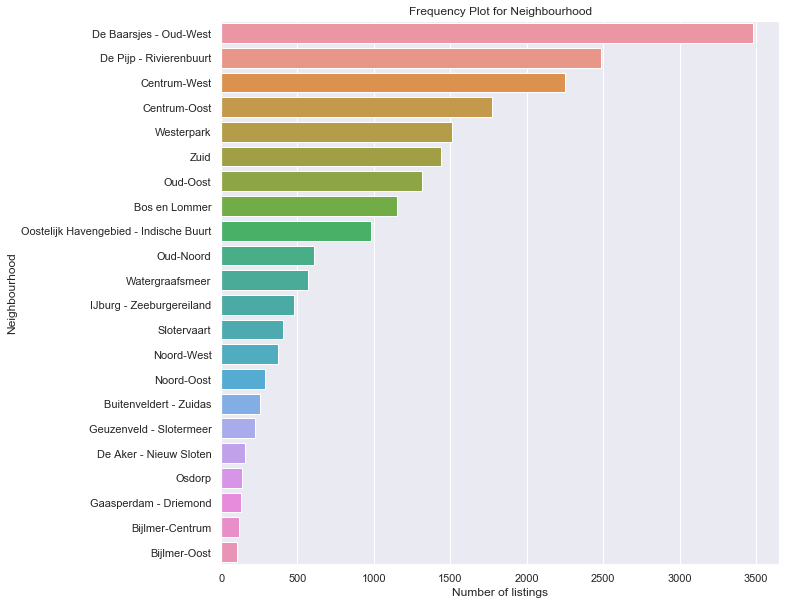

De Baarsjes - Oud-West                    3477
De Pijp - Rivierenbuurt                   2485
Centrum-West                              2248
Centrum-Oost                              1773
Westerpark                                1513
Zuid                                      1441
Oud-Oost                                  1314
Bos en Lommer                             1150
Oostelijk Havengebied - Indische Buurt     981
Oud-Noord                                  611
Watergraafsmeer                            566
IJburg - Zeeburgereiland                   477
Slotervaart                                405
Noord-West                                 371
Noord-Oost                                 286
Buitenveldert - Zuidas                     253
Geuzenveld - Slotermeer                    221
De Aker - Nieuw Sloten                     154
Osdorp                                     138
Gaasperdam - Driemond                      132
Bijlmer-Centrum                            116
Bijlmer-Oost 

In [36]:
fig1 = plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.countplot(y='neighbourhood', data = listing_1, order = listing_1['neighbourhood'].value_counts().index)
plt.ylabel('Neighbourhood')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for Neighbourhood')
plt.show()
listing_1['neighbourhood'].value_counts()


__De Baarsjes has the most number of listings.__

In [10]:
#to make the interactive maps
import folium.plugins as plugins

cluster = folium.FeatureGroup(name='cluster')
cluster.add_child(plugins.MarkerCluster(locations=coords, popups=popups)
from folium.plugins import FastMarkerCluster
lats2018 = listing_1['latitude'].tolist()
lons2018 = listing_1['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.365331836482476, 4.889507435948168], zoom_start=21.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

SyntaxError: invalid syntax (<ipython-input-10-8ea921a533e0>, line 6)

Text(0.5, 1.0, 'Distribution of listings in different Neighbourhood')

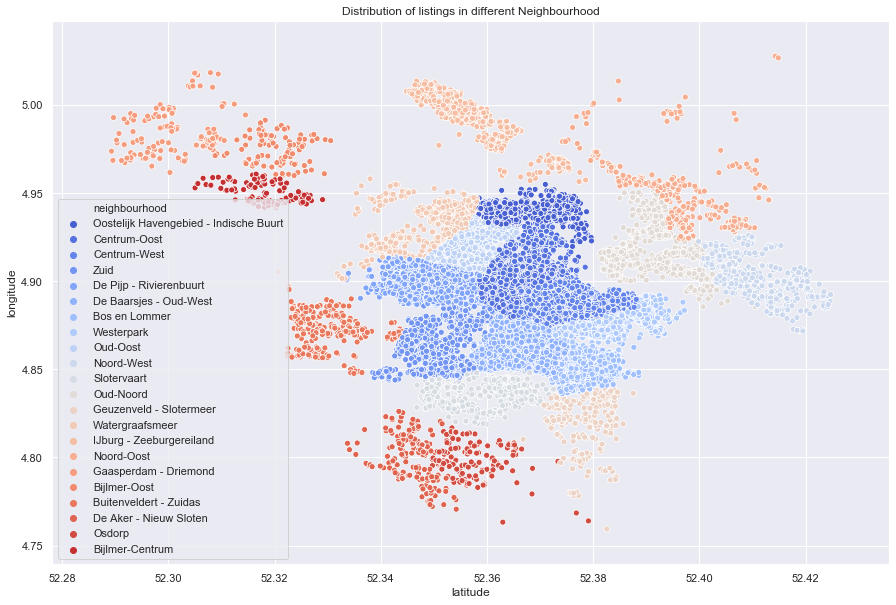

In [49]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='longitude',x='latitude',hue='neighbourhood',palette="coolwarm",data = listing_1)
plt.title('Distribution of listings in different Neighbourhood')

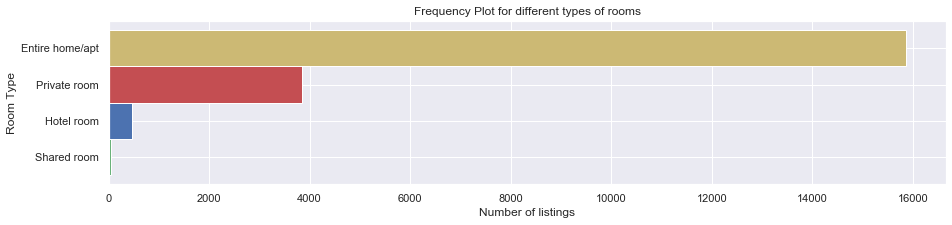

Entire home/apt    15862
Private room        3843
Hotel room           460
Shared room           53
Name: room_type, dtype: int64

In [50]:
#Room types
freq = listing_1['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r","y"])
plt.ylabel('Room Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of rooms')
plt.show()
listing_1['room_type'].value_counts()

## Property Types

In [51]:
listing_1.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast',
       'Guest suite', 'Boat', 'Loft', 'Serviced apartment', 'House',
       'Guesthouse', 'Condominium', 'Villa', 'Camper/RV', 'Chalet',
       'Bungalow', 'Tiny house', 'Island', 'Other', 'Hotel', 'Cabin',
       'Boutique hotel', 'Lighthouse', 'Barn', 'Dome house', 'Cottage',
       'Earth house', 'Casa particular (Cuba)', 'Aparthotel', 'Hostel',
       'Tent', 'Yurt', 'Campsite'], dtype=object)

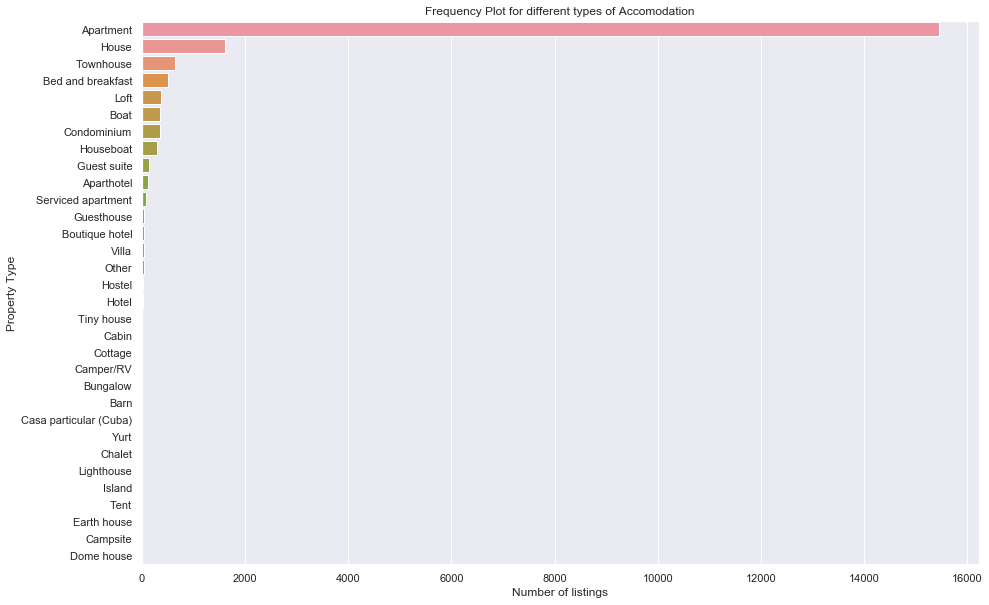

Apartment                 15446
House                      1621
Townhouse                   650
Bed and breakfast           508
Loft                        376
Boat                        361
Condominium                 359
Houseboat                   295
Guest suite                 142
Aparthotel                  115
Serviced apartment           74
Guesthouse                   48
Boutique hotel               39
Villa                        37
Other                        36
Hostel                       29
Hotel                        22
Tiny house                   12
Cabin                        12
Cottage                      11
Camper/RV                     5
Bungalow                      4
Barn                          3
Casa particular (Cuba)        3
Yurt                          2
Chalet                        2
Lighthouse                    1
Island                        1
Tent                          1
Earth house                   1
Campsite                      1
Dome hou

In [52]:
fig2 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.countplot(y='property_type', data = listing_1, order = listing_1['property_type'].value_counts().index)
plt.ylabel('Property Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of Accomodation')
plt.show()
listing_1['property_type'].value_counts()

Many of these property types such as Villa, Boutique hotel have very few listings in Amsterdam. Analyzing the property types that have atleast 100 listings. 

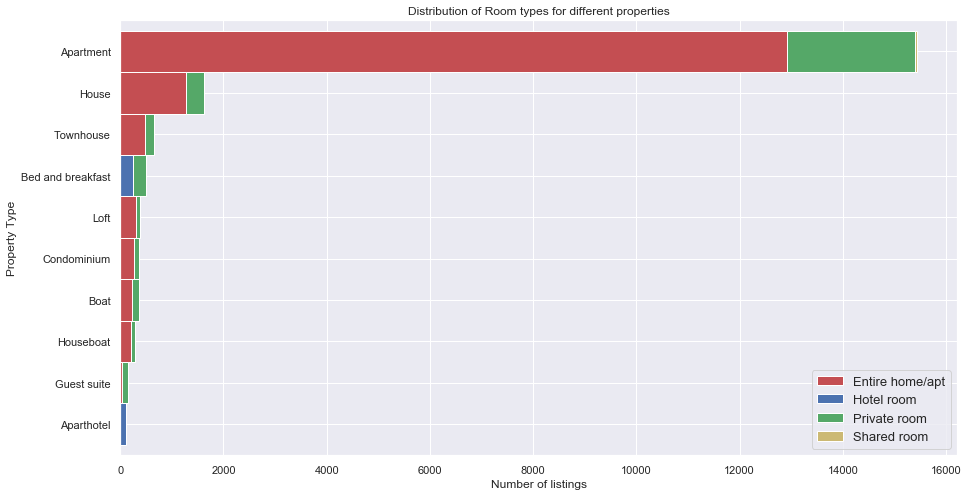

In [53]:
prop = listing_1.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Distribution of Room types for different properties')
plt.xlabel('Number of listings')
plt.ylabel('Property Type')
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Majority of the properties are apartments

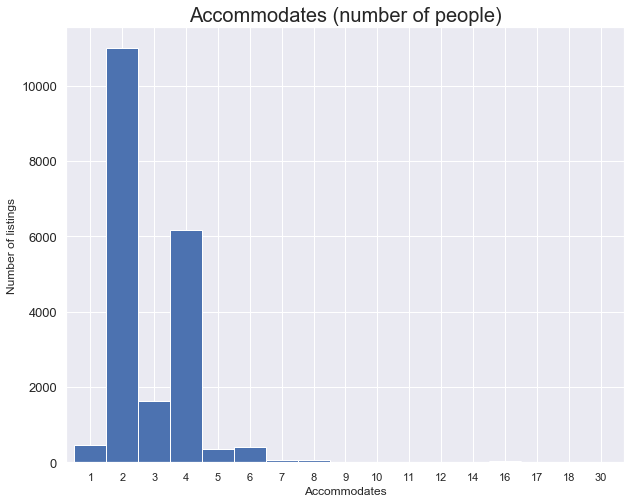

In [54]:
#Accomodates number of people
feq=listing_1['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

However, Amsterdam has an additional restriction. Due to fire hazard considerations and also taking possible noisy group into account, owners are only allowed to rent their property to groups with a maximum of 4 people. This actually means that the listings that indicate that the maximum number of people is above 4 are breaking this rule!

Text(0, 0.5, 'Frequency')

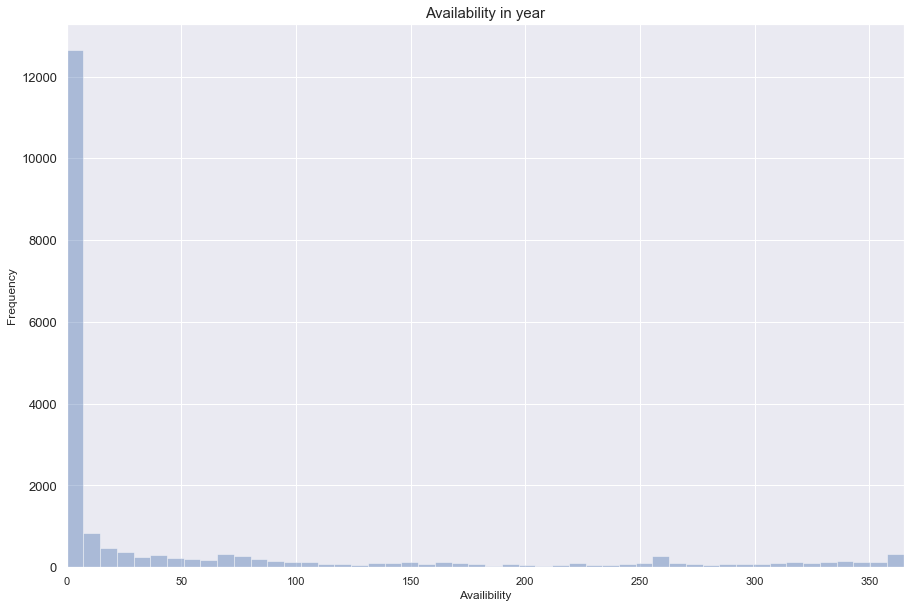

In [55]:
#Availability in a year
plt.figure(figsize=(15,10))
sns.distplot(listing_1.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

Due to the holiday season, the availability is low at the end of the year

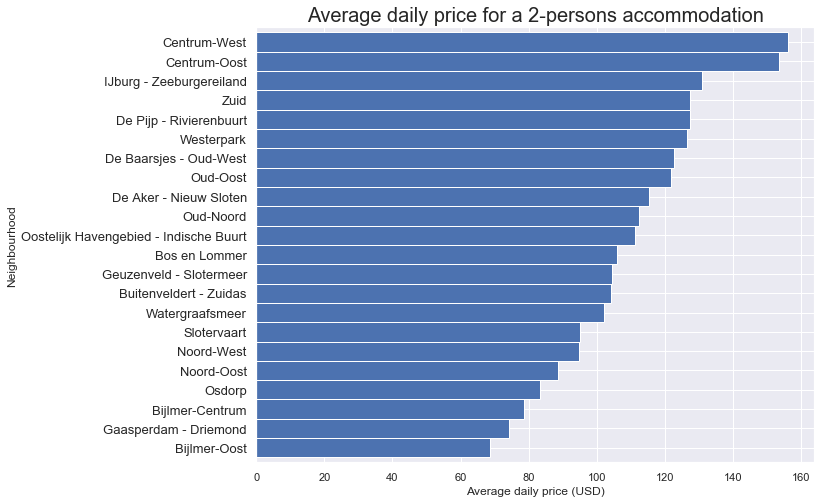

In [56]:
#Prices in Amsterdam Neighbourhoods
feq = listing_1[listing_1['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (USD)', fontsize=12)
plt.ylabel("Neighbourhood")
plt.show()

Since most of the listings accomodate 2 people, the above plot shows the average pricing for 2 people in different neighbourhoods

Text(0, 0.5, '')

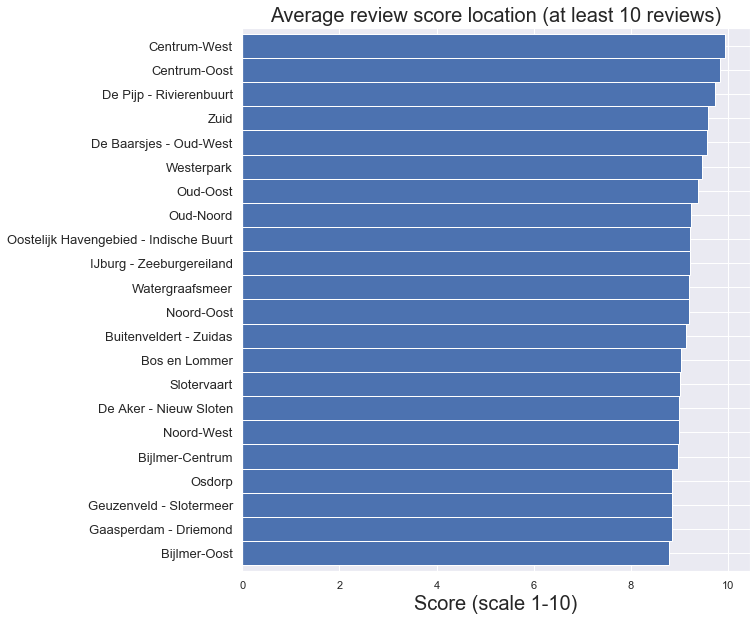

In [59]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
feq = listing_1[listing_1['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

In addition to written reviews, guests can submit an overall star rating and a set of category star ratings. Guests can give ratings on:

1. Overall Experience. What was your overall experience?

2. Cleanliness. Did you feel that your space was clean and tidy?

3. Accuracy. How accurately did your listing page represent your space?

4. Value. Did you feel your listing provided good value for the price?

5. Communication. How well did you communicate with your host before and during their stay?

6. Arrival. How smoothly did their check-in go?

7. Location. How did you feel about the neighborhood?

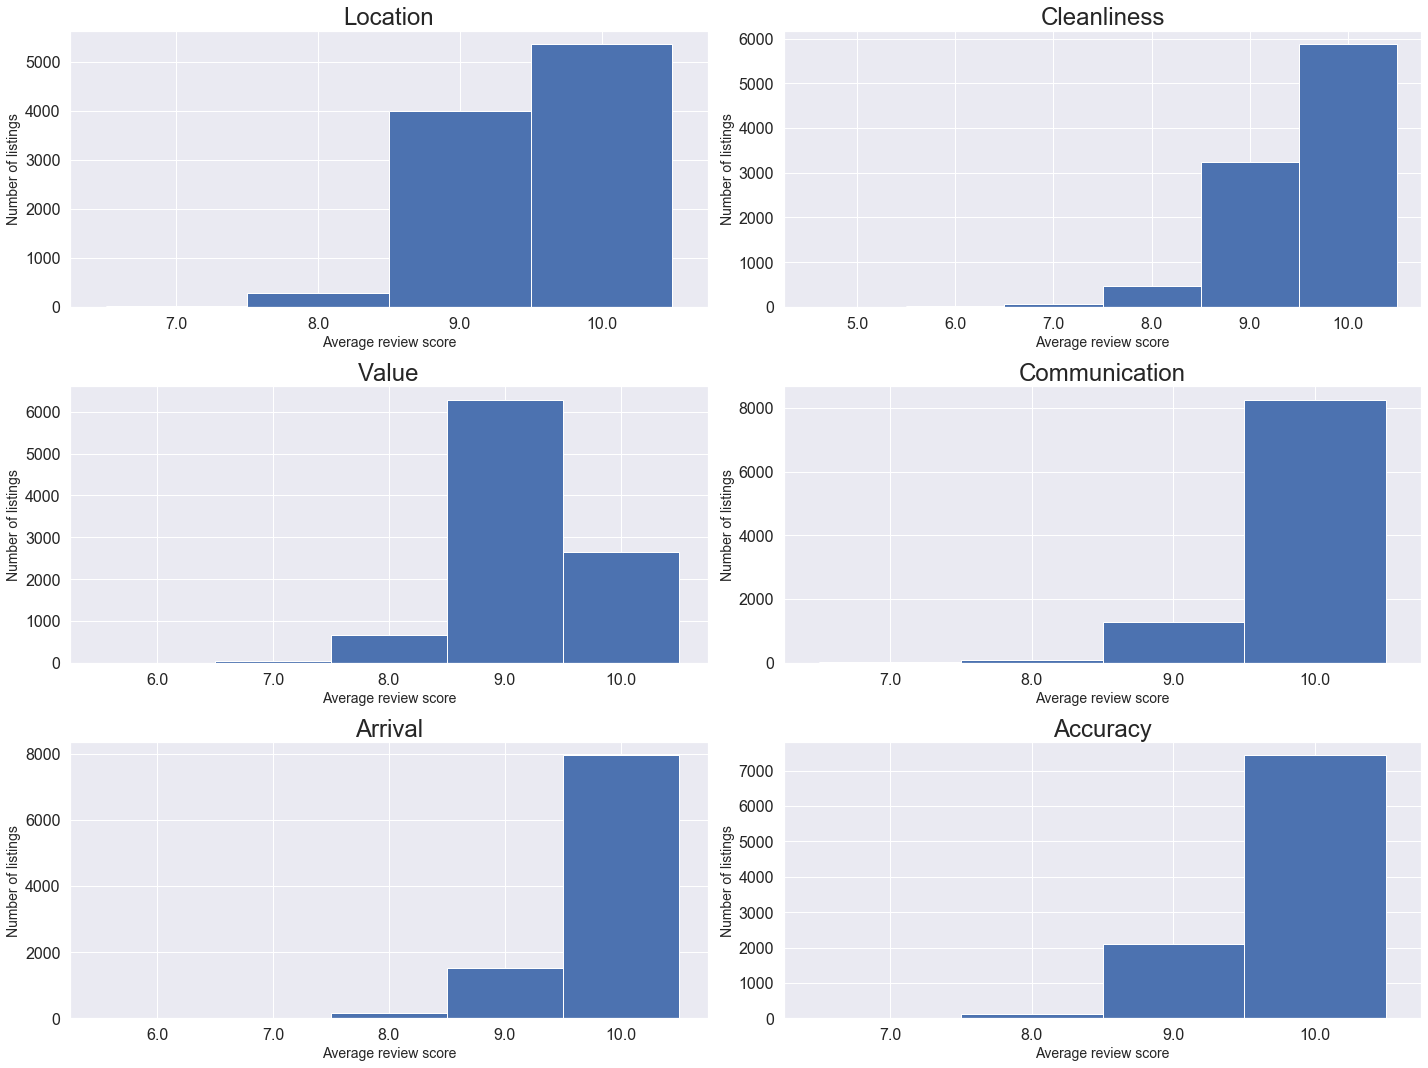

In [60]:
listings10 = listing_1[listing_1['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## RECOMMENDATION

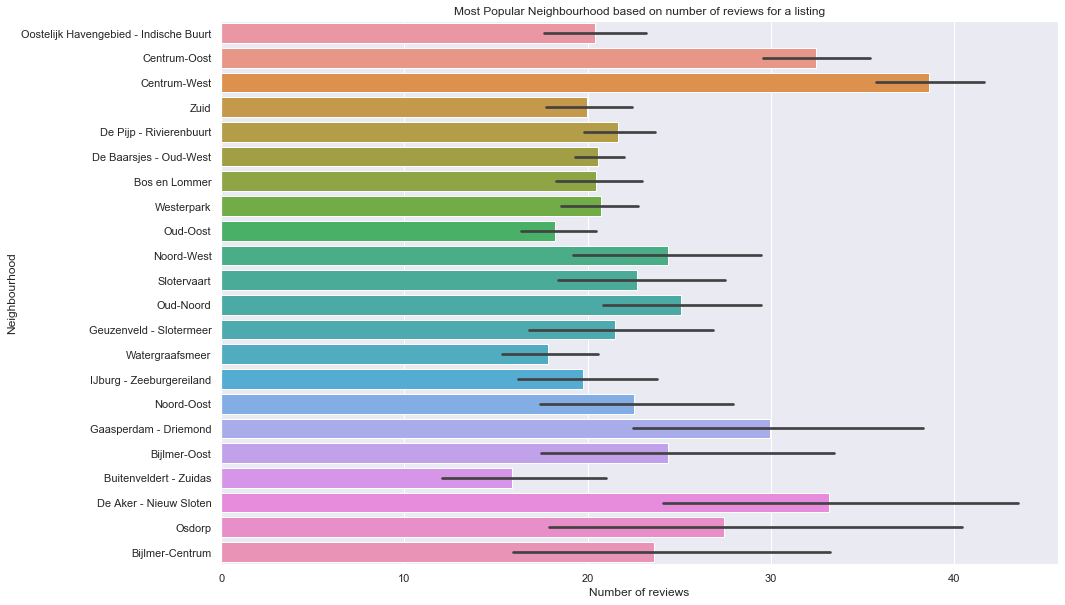

In [62]:
fig4 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(y='neighbourhood', x = 'number_of_reviews',data = listing_1)
plt.ylabel('Neighbourhood')
plt.xlabel('Number of reviews')
plt.title('Most Popular Neighbourhood based on number of reviews for a listing')
plt.show()

In [63]:
centrumwest = listing_1[listing_1['neighbourhood']=='Centrum-West']
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood,price,property_type,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
2,25428,56142,Joan,f,f,52.37297,4.88339,Centrum-West,125,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
3,27886,97647,Flip,t,t,52.38673,4.89208,Centrum-West,155,Houseboat,...,t,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,f,moderate,f,f,10.0,10.0,10.0,10.0,10.0,10.0
5,29051,124245,Edwin,t,t,52.36773,4.89151,Centrum-West,55,Apartment,...,f,moderate,f,f,10.0,10.0,9.0,10.0,10.0,10.0
7,42970,187580,Micha,t,f,52.36781,4.89001,Centrum-West,159,Bed and breakfast,...,t,strict_14_with_grace_period,f,t,10.0,10.0,10.0,10.0,10.0,9.0


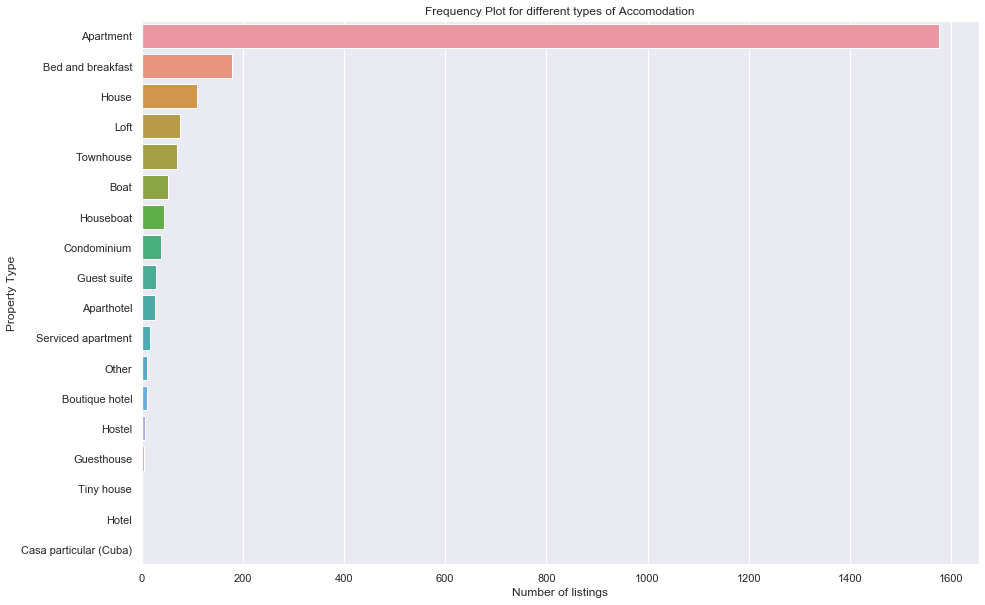

Apartment                 1576
Bed and breakfast          178
House                      110
Loft                        75
Townhouse                   70
Boat                        51
Houseboat                   44
Condominium                 38
Guest suite                 28
Aparthotel                  27
Serviced apartment          17
Other                       10
Boutique hotel              10
Hostel                       7
Guesthouse                   4
Tiny house                   1
Hotel                        1
Casa particular (Cuba)       1
Name: property_type, dtype: int64

In [64]:
#Property Type
fig5 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.countplot(y='property_type', data = centrumwest, order = centrumwest['property_type'].value_counts().index)
plt.ylabel('Property Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of Accomodation')
plt.show()
centrumwest['property_type'].value_counts()

In [65]:
#Selecting apartment as property
centrumwest = centrumwest[centrumwest['property_type']=='Apartment']
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood,price,property_type,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
2,25428,56142,Joan,f,f,52.37297,4.88339,Centrum-West,125,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,f,moderate,f,f,10.0,10.0,10.0,10.0,10.0,10.0
5,29051,124245,Edwin,t,t,52.36773,4.89151,Centrum-West,55,Apartment,...,f,moderate,f,f,10.0,10.0,9.0,10.0,10.0,10.0
8,43109,188098,Aukje,f,t,52.37537,4.88932,Centrum-West,210,Apartment,...,f,moderate,f,f,10.0,8.0,6.0,10.0,10.0,10.0
13,48076,219080,Franklin,t,f,52.38042,4.89453,Centrum-West,350,Apartment,...,f,strict_14_with_grace_period,f,t,10.0,10.0,10.0,10.0,10.0,9.0


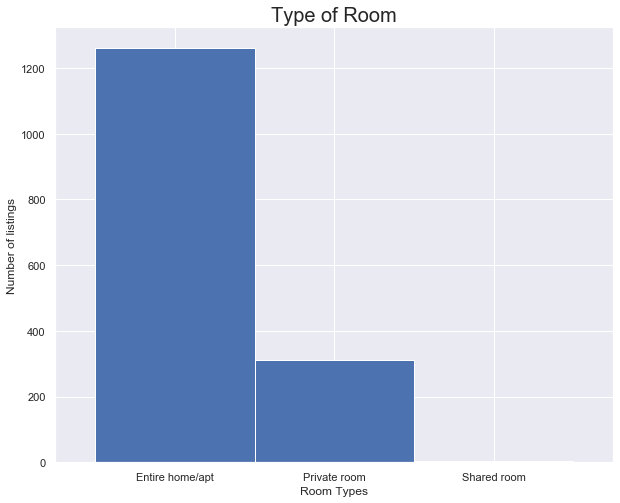

In [66]:
#Room type
room=centrumwest['room_type'].value_counts().sort_index()
room.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Type of Room", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Room Types', fontsize=12)
plt.show()

In [67]:
#Number of bedrooms
#bedrooms=centrumwest['bedrooms'].value_counts().sort_index()
#bedrooms.plot.bar(figsize=(10, 8), width=1, rot=0)
#plt.title("Bedrooms", fontsize=20)
#plt.ylabel('Number of listings', fontsize=12)
#plt.xlabel('Number of bedrooms', fontsize=12)
#plt.show()

In [68]:
#Number of bathrooms
#bathrooms=centrumwest['bathrooms'].value_counts().sort_index()
#bathrooms.plot.bar(figsize=(10, 8), width=1, rot=0)
#plt.title("Bathrooms", fontsize=20)
#plt.ylabel('Number of listings', fontsize=12)
#plt.xlabel('Number of Bathrooms', fontsize=12)
#plt.show()

In [69]:
#Selecting an apartment with 1 bedroom and 1 bathroom
#centrumwest1 = centrumwest[centrumwest['bedrooms']== '1']
#centrumwest1.head()

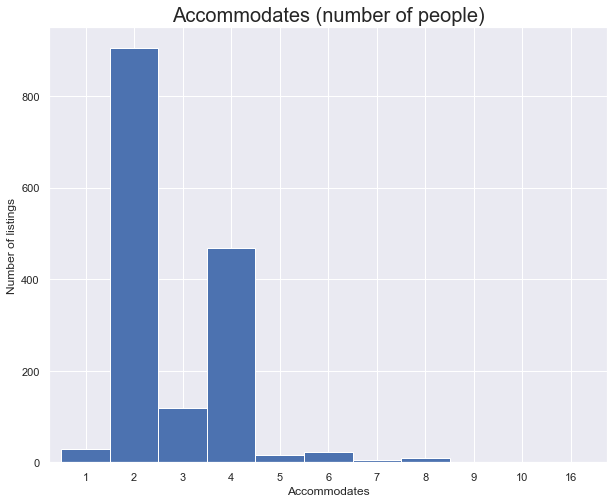

In [70]:
#Accomodates number of people
accomodates=centrumwest['accommodates'].value_counts().sort_index()
accomodates.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [71]:
centrumwest = centrumwest[centrumwest['accommodates']==2]
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood,price,property_type,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,f,moderate,f,f,10.0,10.0,10.0,10.0,10.0,10.0
86,198307,967796,Marie-Katrien,f,f,52.38393,4.89237,Centrum-West,129,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
100,236180,1238074,Rozemarijn,f,t,52.36574,4.88021,Centrum-West,175,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
108,253792,106225,Jeff,f,t,52.37408,4.89779,Centrum-West,193,Apartment,...,t,moderate,f,f,10.0,10.0,10.0,10.0,10.0,9.0
110,254800,1337537,Dj,f,t,52.37131,4.88206,Centrum-West,250,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,9.0


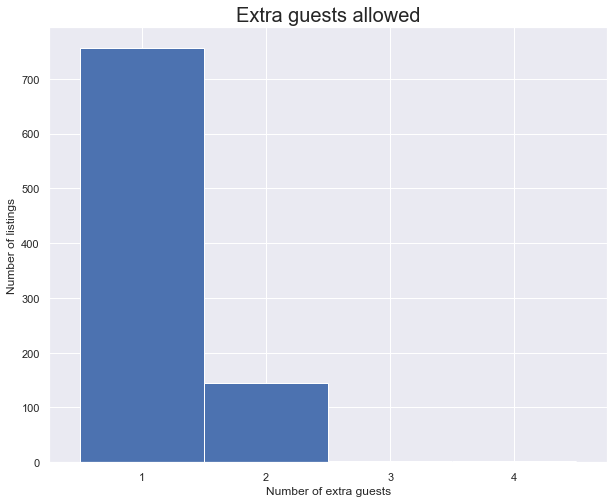

In [72]:
#Extra guests
extguests=centrumwest['guests_included'].value_counts().sort_index()
extguests.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Extra guests allowed", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Number of extra guests', fontsize=12)
plt.show()

In [73]:
centrumwest = centrumwest[centrumwest['guests_included']==1]
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood,price,property_type,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,f,moderate,f,f,10.0,10.0,10.0,10.0,10.0,10.0
86,198307,967796,Marie-Katrien,f,f,52.38393,4.89237,Centrum-West,129,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
110,254800,1337537,Dj,f,t,52.37131,4.88206,Centrum-West,250,Apartment,...,f,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,9.0
126,286500,1491565,David,t,t,52.37497,4.89884,Centrum-West,150,Apartment,...,t,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,10.0
128,290701,1491565,David,t,t,52.37614,4.89894,Centrum-West,150,Apartment,...,t,strict_14_with_grace_period,f,f,10.0,10.0,10.0,10.0,10.0,9.0


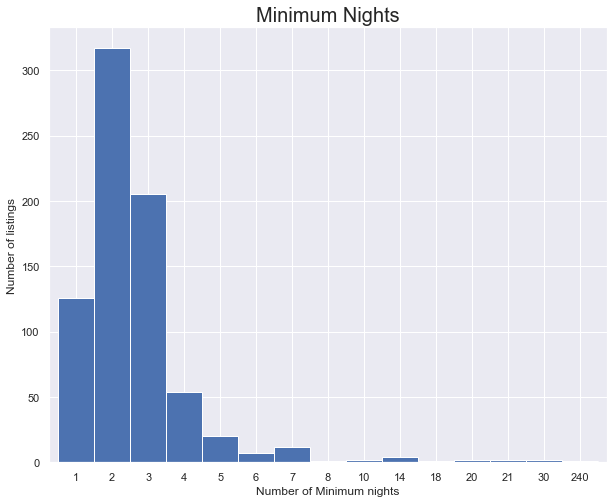

In [74]:
#Number of min nights
min_nights=centrumwest['minimum_nights'].value_counts().sort_index()
min_nights.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Minimum Nights", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Number of Minimum nights', fontsize=12)
plt.show()

In [75]:
centrumwest = centrumwest[centrumwest['minimum_nights']==1]
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood,price,property_type,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
273,582121,2866447,Laura,t,f,52.37441,4.88068,Centrum-West,120,Apartment,...,f,moderate,f,f,10.000000,10.000000,8.000000,9.00000,10.000000,9.000000
492,820692,673543,Liesbeth,f,t,52.37585,4.89346,Centrum-West,85,Apartment,...,f,strict_14_with_grace_period,f,f,10.000000,9.000000,9.000000,10.00000,10.000000,9.000000
1149,1913383,195126,Babette,f,f,52.36674,4.89421,Centrum-West,220,Apartment,...,f,moderate,f,f,10.000000,10.000000,10.000000,10.00000,10.000000,9.000000
1949,3536467,17804711,Liz & Willem,f,t,52.37457,4.88178,Centrum-West,119,Apartment,...,f,moderate,f,f,9.000000,9.000000,9.000000,8.00000,8.000000,8.000000
2079,3778648,19380205,Mado,f,f,52.37448,4.87819,Centrum-West,120,Apartment,...,f,moderate,f,f,9.485703,9.689778,9.469666,9.73934,9.791634,9.183115


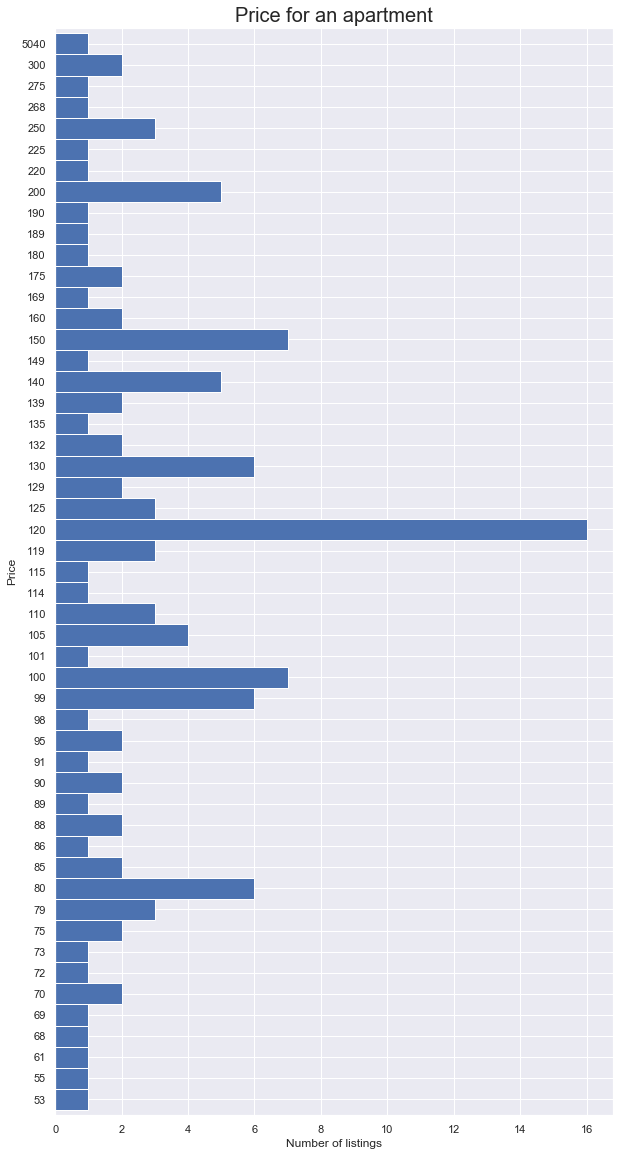

In [76]:
#Price
price=centrumwest['price'].value_counts().sort_index()
price.plot.barh(figsize=(10, 20), width=1, rot=0)
plt.title("Price for an apartment", fontsize=20)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [8]:
#Word Cloud
listing_wordcloud= pd.read_csv('listing_for_modeling.csv')

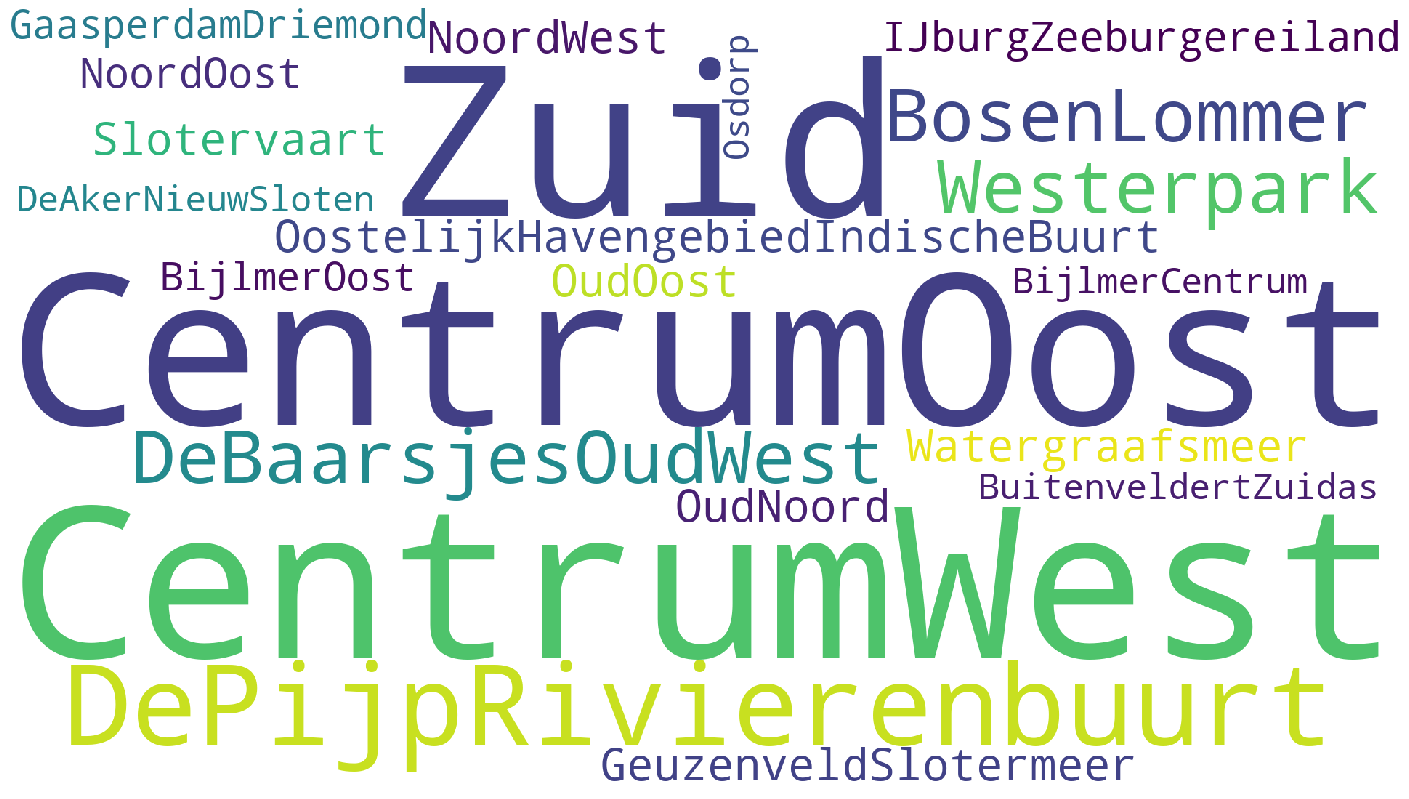

In [9]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(listing_wordcloud.neighbourhood.unique()))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()